In [4]:
from sklearn import datasets
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('belle2')

# Dataset pretuning

* One vs. other (0 vs. 1/2)
* Petal length and petal width


In [9]:
iris = datasets.load_iris()
x  = iris['data'][:, (2,3)]
y = (iris["target"] == 0).astype(np.float64)
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2,random_state=20)

# Model training 

In [10]:
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [11]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

# Prediction and accuracy

In [12]:
svm_clf.predict([[4.6, 3.2]])

array([0.])

In [13]:
from sklearn import metrics
prediction=svm_clf.predict(X_test)
print('The accuracy of the SVM is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the SVM is 1.000


## [Quora](https://datascience.stackexchange.com/questions/17970/how-can-i-know-how-to-interpret-the-output-coefficients-coefs-from-the-mode)

y = -(coef_0 / coef_1) x - intercept/coef_1 is coef_0 x + coef_1 y + intercept = 0, which is the border line separating the blob from the rest. (coef_0, coef_1) is the normal vector and the direction indicates where the blob is.

In [8]:
coef_0 , coef_1 = svm_clf["linear_svc"].coef_.tolist()[0]
intercept = svm_clf["linear_svc"].intercept_[0]
coef_0 , coef_1, intercept

(-1.394550463685442, -0.8107972911914887, -1.2923738606182873)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
X  = iris['data']
Y = iris['target']
n = y.shape[0]
df = pd.DataFrame(np.hstack([X,Y.reshape((n,1))]), columns =['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)', 'target'] )


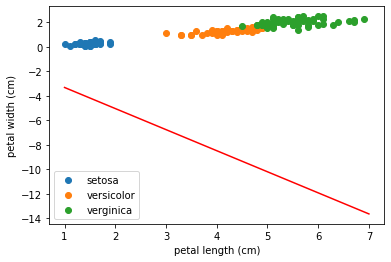

In [11]:
plt.scatter(df.query('target==0')['petal length (cm)'],df.query('target==0')['petal width (cm)'], 
            label = 'setosa' )
plt.scatter(df.query('target==1')['petal length (cm)'],df.query('target==1')['petal width (cm)'],
            label = 'versicolor')
plt.scatter(df.query('target==2')['petal length (cm)'],df.query('target==2')['petal width (cm)'],
            label = 'verginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

xline = np.linspace(1,7,100)

## find the st line eqn from the theta values
#######
yline = -(coef_0 / coef_1)* xline- intercept/coef_1
plt.plot(xline, yline, '-r',label='Decision boundary')
plt.show()
#########

## [Towards data science](https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0)


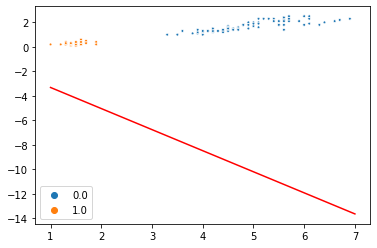

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);# Constructing a hyperplane using a formula.
w =  svm_clf["linear_svc"].coef_[0]           # w consists of 2 elements
b =  svm_clf["linear_svc"].intercept_[0]      # b consists of 1 element
x_points = np.linspace(1, 7)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

<span class="girk">The reason why the above two case fails because I have used feature scaling in the pipeline which is not taking into account when plotting manually. Hence there are two options
 * Plot the scaled feature to show decision boundary
 * Find out intercept for unscaled feature
 
 I am going for the 1st options here</span>

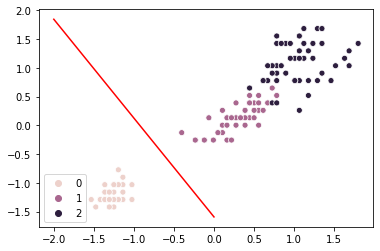

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=svm_clf["scaler"].transform(X[:,2:4])[:,0], 
                y=svm_clf["scaler"].transform(X[:,2:4])[:,1], 
                hue=Y,);# Constructing a hyperplane using a formula.
w =  svm_clf["linear_svc"].coef_[0]           # w consists of 2 elements
b =  svm_clf["linear_svc"].intercept_[0]      # b consists of 1 element
x_points = np.linspace(-2, 0)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

## [Use mlxtend package](https://github.com/rasbt/mlxtend)

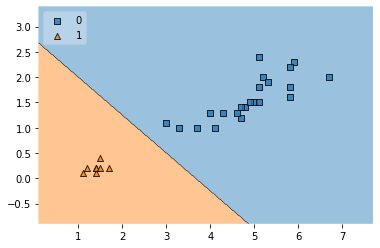

In [14]:
plot_decision_regions(X_test, y_test.astype(np.int_), clf=svm_clf, legend=2)
plt.show()


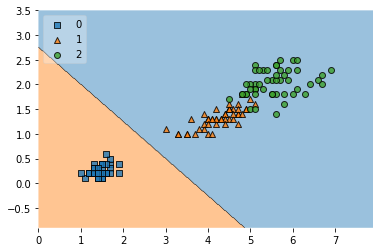

In [15]:
plot_decision_regions(X[:,2:4], Y, clf=svm_clf, legend=2)
plt.show()

<span class="girk">Since this plot is automatic, this take into account the feature scaling and plot for unscaled feature by reverting intercept and slopes</span>

# beyond 2d

In [16]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [42]:
iris = datasets.load_iris()
x  = iris['data'][:, (1, 2,3)]
y = (iris["target"] == 2).astype(np.float64)
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2,random_state=20)

In [43]:
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [44]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [45]:
#pip install ipympl

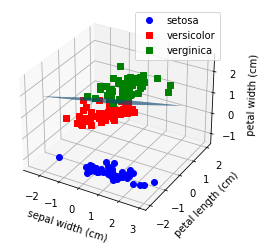

In [51]:
%matplotlib inline
z = lambda x,y: (-svm_clf["linear_svc"].intercept_[0]-svm_clf["linear_svc"].coef_[0][0]*x-\
                 svm_clf["linear_svc"].coef_[0][1]*y) / svm_clf["linear_svc"].coef_[0][2]
tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))


Xplot = svm_clf["scaler"].transform(X[:,1:4])[:,0]
Yplot = svm_clf["scaler"].transform(X[:,1:4])[:,1]
Zplot = svm_clf["scaler"].transform(X[:,1:4])[:,2]

ax.set_ylabel('petal length (cm)')
ax.set_zlabel('petal width (cm)')
ax.set_xlabel('sepal width (cm)')

ax.plot3D(Xplot[iris['target']==0], \
          Yplot[iris['target']==0], Zplot[iris['target']==0],'ob', label = 'setosa')
ax.plot3D(Xplot[iris['target']==1], \
          Yplot[iris['target']==1], Zplot[iris['target']==1],'sr',  label = 'versicolor')
ax.plot3D(Xplot[iris['target']==2], \
          Yplot[iris['target']==2], Zplot[iris['target']==2],'sg',  label = 'verginica')
plt.legend()
plt.show()

# Plotting the margin , support vectors and effect on margin while varying  C

In [13]:
iris = datasets.load_iris()
x  = iris['data'][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

<span class="girk">Using `SVC` to find support vectors as attributes</span>

In [14]:
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc",  SVC(C=1, kernel='linear')),
])

In [15]:
svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=1, kernel='linear'))])

![margin](bQz9W852S0Sh_rzpqWyIXg.png)

If equation of a strainght line is `ax + by = c`, then we can rewrite it as, $\vec{r} \cdot (a \hat{i} + b \hat{i}) = c$, which tells $\vec{v} = a \hat{i} + b \hat{i}$ is perpendicular the straight line. We can  interpret the vector equation as projection of $\vec{v}$ to the st line (  points on st line $\vec{r}$) is `c`.

In this context decision boundary is `w1 x + w2 y = b`, or $\vec{w}\cdot \vec{r} = b$. According to the article in [Towards data science](https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0)  magnitude of margin is $m = 1/||w||$. So margin will be 

$\vec{w} \cdot (\vec{r} \pm m \hat{w})  = b$ 

or $\vec{w} \cdot \vec{r} \pm m\vec{w} \cdot \hat{w}  = b$ 

or $\vec{w} \cdot \vec{r} \pm  1  = b$ 

or $\vec{w} \cdot \vec{r}   = b \pm  1$ 

Hence from decision boundary to margin we have to change intercept $b$ by one unit $b \pm 1$

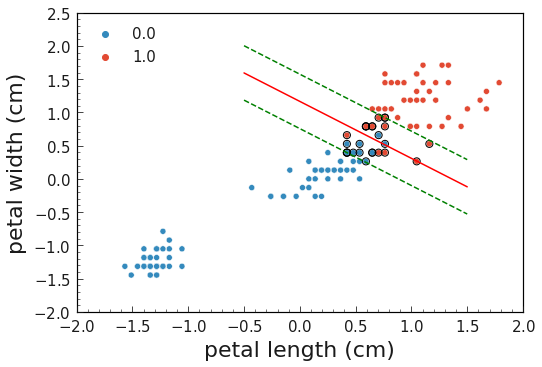

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting deision boundary
sns.scatterplot(x=svm_clf["scaler"].transform(x)[:,0], 
                y=svm_clf["scaler"].transform(x)[:,1], 
                hue=y,)
w =  svm_clf["linear_svc"].coef_[0]           # w consists of 2 elements
b =  svm_clf["linear_svc"].intercept_[0]      # b consists of 1 element
x_points = np.linspace(-0.5, 1.5)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

## Plotting support vectors
plt.scatter(svm_clf["linear_svc"].support_vectors_[:, 0],
            svm_clf["linear_svc"].support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=1);

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
# margin


margin1y_points = -(w[0] / w[1]) * x_points - (b+1) / w[1] 
plt.plot(x_points,margin1y_points, '--g', )


margin2y_points = -(w[0] / w[1]) * x_points - (b-1) / w[1]  
plt.plot(x_points,margin2y_points, '--g')

plt.show()

## tuning C from 1 to 0.1

In [17]:
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc",  SVC(C=0.1, kernel='linear')),
])
svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=0.1, kernel='linear'))])

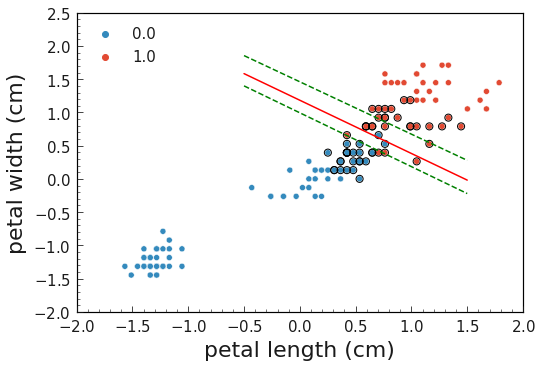

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
## Plotting deision boundary
sns.scatterplot(x=svm_clf["scaler"].transform(x)[:,0], 
                y=svm_clf["scaler"].transform(x)[:,1], 
                hue=y,)
w =  svm_clf["linear_svc"].coef_[0]           # w consists of 2 elements
b =  svm_clf["linear_svc"].intercept_[0]      # b consists of 1 element
x_points = np.linspace(-0.5, 1.5)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

## Plotting support vectors
plt.scatter(svm_clf["linear_svc"].support_vectors_[:, 0],
            svm_clf["linear_svc"].support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=1);

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

# margin
wfront = w + what/wmod

margin1y_points = -(wfront[0] / wfront[1]) * x_points - b / wfront[1]  # getting corresponding y-points# Plotting a red hyperplane
plt.plot(x_points,margin1y_points, '--g', )

wback = w - what/wmod

margin2y_points = -(wback[0] / wback[1]) * x_points - b / wback[1]  # getting corresponding y-points# Plotting a red hyperplane
plt.plot(x_points,margin2y_points, '--g')

plt.show()

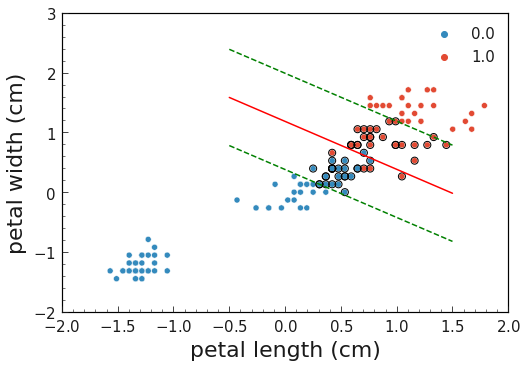

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting deision boundary
sns.scatterplot(x=svm_clf["scaler"].transform(x)[:,0], 
                y=svm_clf["scaler"].transform(x)[:,1], 
                hue=y,)
w =  svm_clf["linear_svc"].coef_[0]           # w consists of 2 elements
b =  svm_clf["linear_svc"].intercept_[0]      # b consists of 1 element
x_points = np.linspace(-0.5, 1.5)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

## Plotting support vectors
plt.scatter(svm_clf["linear_svc"].support_vectors_[:, 0],
            svm_clf["linear_svc"].support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=1);

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

# margin


margin1y_points = -(w[0] / w[1]) * x_points - (b+1) / w[1] 
plt.plot(x_points,margin1y_points, '--g', )


margin2y_points = -(w[0] / w[1]) * x_points - (b-1) / w[1]  
plt.plot(x_points,margin2y_points, '--g')

plt.show()

### Changing x, y directly

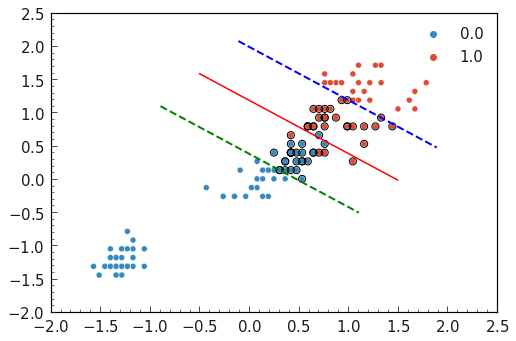

In [21]:
sns.scatterplot(x=svm_clf["scaler"].transform(x)[:,0], 
                y=svm_clf["scaler"].transform(x)[:,1], 
                hue=y,)

wmod = np.sqrt(np.sum(w**2))
w_hat = w/wmod
margin = 1/wmod

decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

plt.plot(x_points, y_points, c='r')


plt.scatter(svm_clf["linear_svc"].support_vectors_[:, 0],
            svm_clf["linear_svc"].support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=1);


# Non linear

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
x = np.array([-4,-3,-2,-1, 0, 1, 2, 3, 4]).reshape(9,1)
y = np.array([ 1, 1, 0, 0, 0, 0, 0, 1, 1])

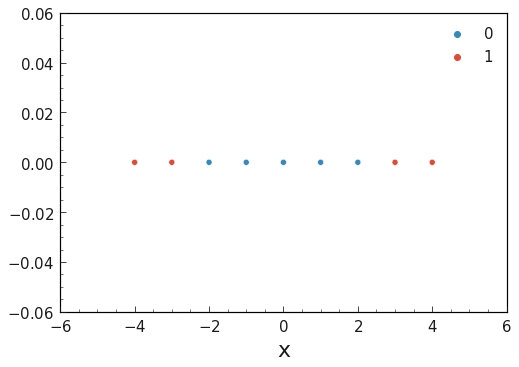

In [45]:
sns.scatterplot(x = x[:,0],y = np.zeros(9), hue=y)
plt.xlabel('x')
plt.show()

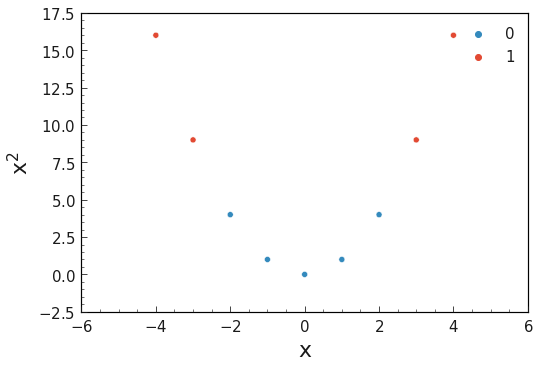

In [48]:
sns.scatterplot(x = x[:,0],y = (x**2)[:,0], hue=y)
plt.xlabel('x')
plt.ylabel('x$^2$')
plt.show()

## Manual polynomial

In [66]:
x1 = x**2
X = np.hstack([x,x1])

In [68]:
ploy_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("CVC", SVC(kernel='linear', C=1))
])

In [70]:
ploy_kernel.fit(X,y)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('CVC', SVC(C=1, kernel='linear'))])

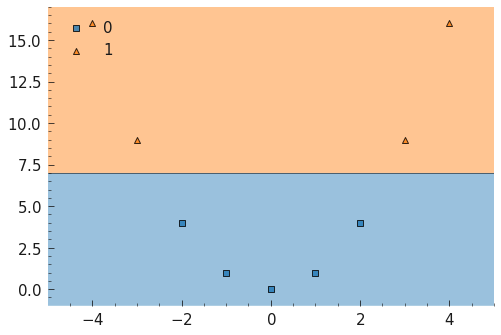

In [71]:
plot_decision_regions(X,y, clf=ploy_kernel, legend=2)
plt.show()

## Preprocessing using polynomial

In [58]:
svm_poly = Pipeline([
    ("poly_feature",PolynomialFeatures(degree=2)),
    ("scaler",StandardScaler()),
    ( "svm_clf",LinearSVC(C=1, loss="hinge"))
])

In [59]:
svm_poly.fit(x,y)

Pipeline(steps=[('poly_feature', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

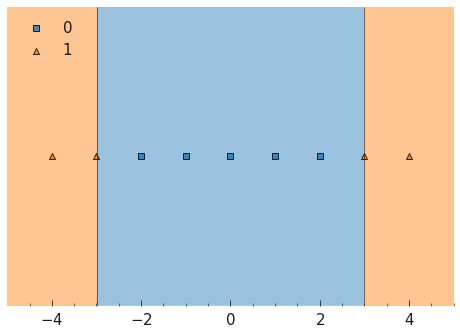

In [61]:
plot_decision_regions(x,y, clf=svm_poly, legend=2)
plt.show()

## Kernel poly

In [63]:
ploy_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("Poly_kernel", SVC(kernel='poly', degree=2, C=1))
])

In [64]:
ploy_kernel.fit(x,y)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Poly_kernel', SVC(C=1, degree=2, kernel='poly'))])

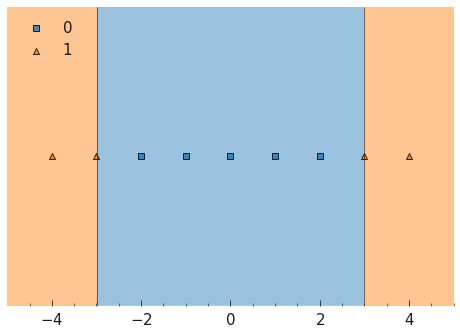

In [65]:
plot_decision_regions(x,y, clf=ploy_kernel, legend=2)
plt.show()

## Moons

In [98]:
data = datasets.make_moons(noise=0.5, random_state= 0)
X = data[0]
y =  data[1]

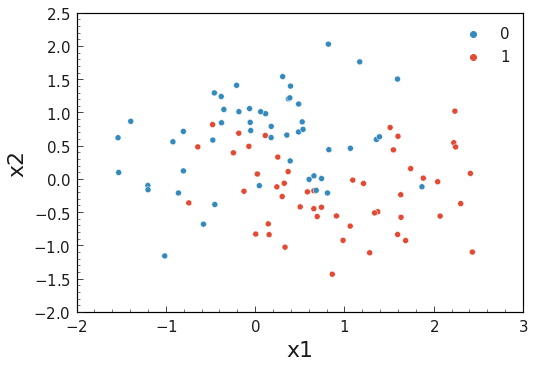

In [101]:
sns.scatterplot(x = X[:,0],y = X[:,1], hue=y )
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

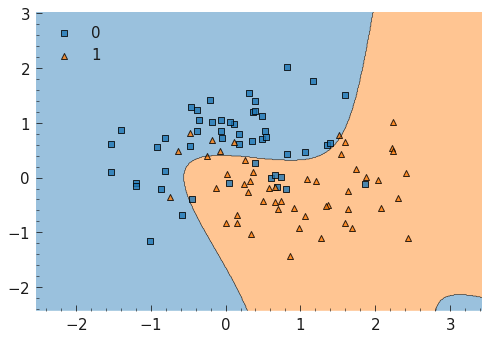

In [104]:
ploy3_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("Poly_kernel", SVC(kernel='poly', degree=3, C=1, coef0 = 1))
])
ploy3_kernel.fit(X,y)
plot_decision_regions(X,y, clf=ploy3_kernel, legend=2)
plt.show()

### Few alternation

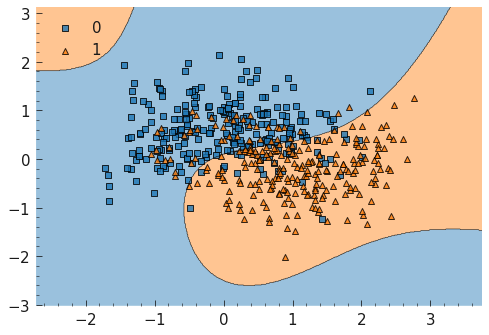

In [116]:
data = datasets.make_moons(noise=0.5, random_state= 0, n_samples=500)
X = data[0]
y =  data[1]
ploy3_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("Poly_kernel", SVC(kernel='poly', degree=3, C=1, coef0 = 1))
])
ploy3_kernel.fit(X,y)
plot_decision_regions(X,y, clf=ploy3_kernel, legend=2)
plt.show()

## Gaussian rbf

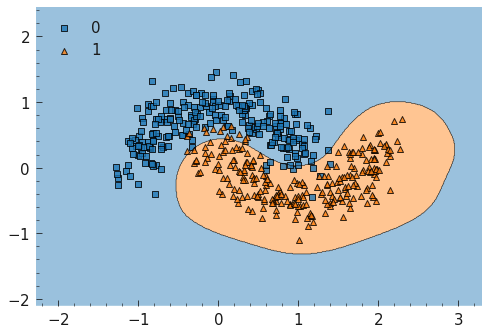

In [122]:
data = datasets.make_moons(noise=0.2, random_state= 0, n_samples=500)
X = data[0]
y =  data[1]
ployrbf_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("Poly_kernel", SVC(kernel='rbf', gamma=3, C=0.0001))
])
ployrbf_kernel.fit(X,y)
plot_decision_regions(X,y, clf=ployrbf_kernel, legend=2)
plt.show()

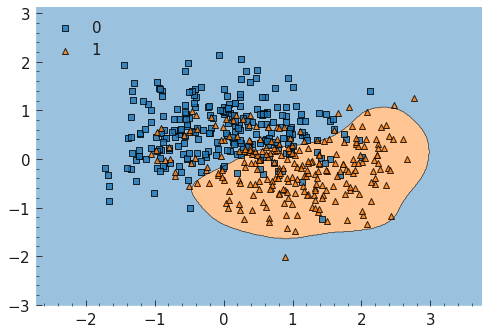

In [123]:
data = datasets.make_moons(noise=0.5, random_state= 0, n_samples=500)
X = data[0]
y =  data[1]
ployrbf_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("Poly_kernel", SVC(kernel='rbf', gamma=3, C=0.0001))
])
ployrbf_kernel.fit(X,y)
plot_decision_regions(X,y, clf=ployrbf_kernel, legend=2)
plt.show()